<a href="https://colab.research.google.com/github/pauljohnson1990/pauljohnson1990-Human-Activity-Prediction-using-Different-Machine-Learning-Algorithm/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading prepared Data 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coventry Machine Learning/Couesework/activitydata.csv',index_col=[0] )

In [ ]:
df.head()

,SN_T1_1,SN_T2_1,SN_T3_1,SN_T4_1,SN_T5_1,SN_T6_1,SN_T7_1,SN_T8_1,SN_T9_1,SN_RA1_1,...,SN_LL1_125,SN_LL2_125,SN_LL3_125,SN_LL4_125,SN_LL5_125,SN_LL6_125,SN_LL7_125,SN_LL8_125,SN_LL9_125,activity
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-2.8154,-9.0600,2.6025,-0.003904,-0.006729,-0.009789,0.73897,0.30275,-0.056262,1
1,7.9665,1.1684,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429,0.62906,...,-2.8233,-9.0757,2.6337,-0.006769,-0.006575,-0.004326,0.74027,0.30192,-0.057155,1
2,7.8917,1.1390,5.6980,0.014180,0.028722,-0.009079,-0.79531,-0.069460,0.12447,0.60430,...,-2.8091,-9.0846,2.6295,-0.000714,-0.002681,0.004770,0.74072,0.30101,-0.057301,1
3,7.9366,1.1536,5.6318,0.003242,0.029965,0.009111,-0.79292,-0.070358,0.13194,0.59417,...,-2.8844,-9.0849,2.6298,-0.010604,-0.002827,-0.004194,0.74150,0.30305,-0.055743,1
4,7.8913,1.1972,5.9082,-0.044333,-0.067467,-0.004235,-0.79592,-0.073174,0.12086,0.56915,...,-2.8249,-9.1083,2.6322,0.013583,0.013670,0.007613,0.74007,0.30324,-0.055548,1


In [ ]:
Activity=['sitting (A01)',
'standing (A2)',
'lying on back (A3)','lying on right side (A4)',
'ascending stairs (A5)',
'descending stairs (A6)',
'standing in an elevator still (A7)',
'moving around in an elevator (A8)',
'walking in a parking lot (A9)',
'walking on a treadmill with a speed of 4 km/h in flat (A10)' ,
'walking on a treadmill with a speed of 4 km/h in 15 deg inclined positions (A11)',
'running on a treadmill with a speed of 8 km/h (A12)',
'exercising on a stepper (A13)',
'exercising on a cross trainer (A14)',
'cycling on an exercise bike in horizontal position (A15)',
'cycling on an exercise bike in vertical position (A16)',
'rowing (A17)',
'jumping (A18)',
'playing basketball (A19)']
target_names=['A{:02d}'.format(i) for i in range(1,20)]

# Checking the Classes of Data is balanced or Not

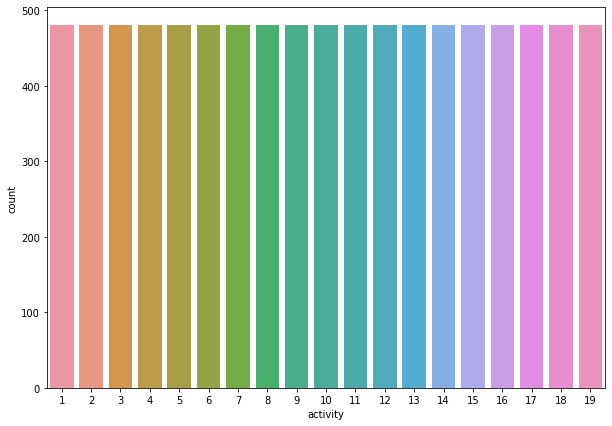

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='activity',data=df)
plt.show()

Data Set is well balanced as there is as each category is having same no of samples

# Checking for Null values

In [ ]:
df[df.isnull()==True].sum(axis=1).sum()

0.0

 No Null values in any columns

# Importing Required Packages for Model Building

In [ ]:
# Importing packages for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# impoting Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# import neccessar packages for Hyperparameter Tuning the model, testing the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform

#Importing packages for comparison of Different models
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time

# Importing Voting Classifier to combine the best three classifier 
from sklearn.ensemble import VotingClassifier

# Import package to save the scaling,pca and the final model. This can be used if planning for deployment
import pickle

In [ ]:
X=df.iloc[:,:-1]  
Y=df.iloc[:,-1]

In [ ]:
Y.nunique()

19

In [ ]:
n_samples = X.shape[0]
n_features = X.shape[1]
n_classes = Y.nunique()

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 9120
n_features: 5625
n_classes: 19


# Scaling and Dividing the samples to testing and training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print (" Shape of Training Data X: ",X_train.shape,"Y :",y_train.shape)
print("Shape of Testing Data X:",X_test.shape ,"Y :",y_test.shape)

 Shape of Training Data X:  (6840, 5625) Y : (6840,)
Shape of Testing Data X: (2280, 5625) Y : (2280,)


# Principal Component Analysis -
## For dimensionality reduction

In [ ]:
n_components = 600
pca=PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=600)

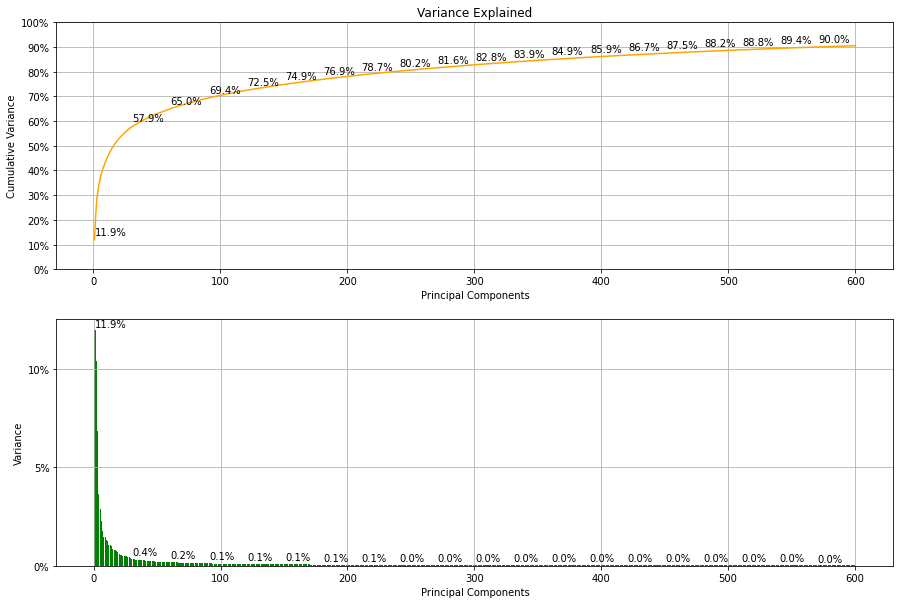

In [ ]:
evr=pca.explained_variance_ratio_
cumevr=np.cumsum(evr)
n=len(evr)


plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.title("Variance Explained")
plt.plot(range(1,n+1),cumevr,label='Cumualative Variance ',color='orange')
l = np.arange(0,110,10)
l=np.core.defchararray.add(l.astype(str),'%')
for i in range(1,n+1,30):
  plt.text(x=i,y=cumevr[i-1]+0.02,s=str(np.round(cumevr[i-1]*100,1))+str('%'))
plt.yticks(ticks=np.arange(0,1.1,0.1),labels=l)
plt.grid()
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance")

plt.subplot(2,1,2)
l = np.arange(0,110,5)
l=np.core.defchararray.add(l.astype(str),'%')
plt.bar(range(1,n+1),evr,label='Variance',color='g')
plt.yticks(ticks=np.arange(0,.15,0.05),labels=l)
PCs= ['PC{:02d}'.format(i) for i in range(1,n+1)]
#plt.xticks(ticks=np.arange(1,n+1),labels=PCs)
for i in range(1,n+1,30):
  plt.text(x=i-.2,y=evr[i-1]+.002,s=str(np.round(evr[i-1]*100,1))+str('%'))
plt.grid()
plt.xlabel("Principal Components")
plt.ylabel("Variance")

plt.show()

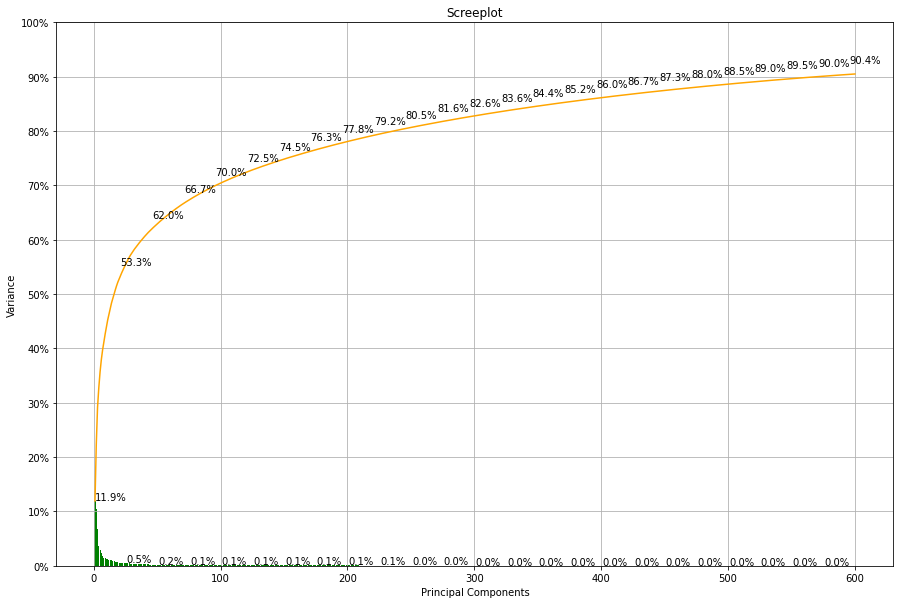

In [ ]:
evr=pca.explained_variance_ratio_
cumevr=np.cumsum(evr)
n=len(evr)
l = np.arange(0,110,10)
l=np.core.defchararray.add(l.astype(str),'%')
plt.figure(figsize=(15,10))
plt.title("Screeplot")
plt.bar(range(1,n+1),evr,label='Variance',color='g')
PCs= ['PC{:02d}'.format(i) for i in range(1,n+1)]
#plt.xticks(ticks=np.arange(1,n+1),labels=PCs)
for i in range(1,n+1,25):
  plt.text(x=i-.2,y=evr[i-1]+.002,s=str(np.round(evr[i-1]*100,1))+str('%'))
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(1,n+1),cumevr,label='Cumualative Variance ',color='orange')
l = np.arange(0,110,10)
l=np.core.defchararray.add(l.astype(str),'%')
for i in range(21,n+1,25):
    plt.text(x=i,y=cumevr[i-1]+0.02,s=str(np.round(cumevr[i-1]*100,1))+str('%'))
plt.yticks(ticks=np.arange(0,1.1,0.1),labels=l)
plt.grid()
plt.show()

The 600 principal components explains 90%  variance in the data, therefore we can use the new 600 features to train a model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Transforming Training Data and Test Data with PCA

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(X_train_pca.shape,X_test_pca.shape)

(6840, 600) (2280, 600)


## Model Building

In [ ]:
#1. Decision Tree with hyperparameter tuning

start_time = time.perf_counter()

param = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(5, 51, 5)], # [30, 50, 60, 100]
    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid_dt.fit(X_train_pca, y_train)
print('Best DT Classifier:', grid_dt.best_params_, 'Best Score:', grid_dt.best_score_)  

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time Required",round(elapsed_time,2),"Seconds")

Best DT Classifier: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} Best Score: 0.4745614035087719
Time Required 14192.83 Seconds


In [ ]:
dt_clf=grid_dt.best_estimator_
print("DT's accuracy: %.2f%%" % (100*dt_clf.score(X_test_pca, y_test)))

DT's accuracy: 45.48%


In [ ]:
#2. Support Vector with hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

start_time = time.perf_counter()

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf_pca_rscv = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
res = clf_pca_rscv.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(res.best_estimator_)

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time Required",round(elapsed_time,2),"Seconds")

Best estimator found by grid search:
SVC(C=10878.958287823649, class_weight='balanced', gamma=0.0003917246929082202)
Time Required 686.72 Seconds


In [ ]:
svc_pca = res.best_estimator_
print("SVC's accuracy: %.2f%%" % (100*svc_pca.score(X_test_pca, y_test)))

SVC's accuracy: 96.58%


In [ ]:
#3. Logistic Regression with Hyperparameter tuning

start_time = time.perf_counter()

param_logreg = {
    'penalty': ['l1','l2'],
    'C': [c / 10.0 for c in range(1, 10, 1)] + list(range(1, 11, 1)), # [30, 50, 60, 100]
}
grid_logreg = GridSearchCV(LogisticRegression(), param_grid=param_logreg, cv=5) # default scoring: accuracy_score
grid_logreg.fit(X_train_pca, y_train)
print('Best LogReg Classifier:', grid_logreg.best_params_, 'Best Score:', grid_logreg.best_score_)

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time Required",round(elapsed_time,2),"Seconds")

Best LogReg Classifier: {'C': 6, 'penalty': 'l2'} Best Score: 0.9381578947368421
Time Required 643.36 Seconds


In [ ]:
logreg_clf = grid_logreg.best_estimator_
print("LogReg's accuracy: %.2f%%" % (100*logreg_clf.score(X_test_pca, y_test)))

LogReg's accuracy: 94.12%


In [ ]:
# 4. Gaussian Naive Bayes with Hyperparameter Tuning

start_time = time.perf_counter()

param_gnb = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

grid_gnb = GridSearchCV(GaussianNB(), param_gnb, cv=5) 
grid_gnb.fit(X_train_pca, y_train)
print('Best GNB Classifier:', grid_gnb.best_params_, 'Best Score:', grid_gnb.best_score_)

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time Required",round(elapsed_time,2),"Seconds")

Best GNB Classifier: {'var_smoothing': 1e-06} Best Score: 0.8299707602339181
Time Required 6.18 Seconds


In [ ]:
GNB_pca=grid_gnb.best_estimator_
print("GNB's accuracy: %.2f%%" % (100*GNB_pca.score(X_test_pca, y_test)))

GNB's accuracy: 83.86%


In [ ]:
# 5. Random Forest with Hyperparameter Tuning

start_time = time.perf_counter()

param_rf = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": list(range(200, 1001, 200))
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=5)
grid_rf.fit(X_train_pca, y_train)
print('Best RF Classifier:', grid_rf.best_params_, 'Best Score:', grid_rf.best_score_)

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time Required",round(elapsed_time,2),"Seconds")

Best RF Classifier: {'criterion': 'gini', 'n_estimators': 1000} Best Score: 0.9834795321637427
Time Required 7315.46 Seconds


In [ ]:
RF_pca = grid_rf.best_estimator_
print("RF's accuracy: %.2f%%" % (100*RF_pca.score(X_test_pca, y_test)))

RF's accuracy: 98.68%


# Comparison of Different Algorithms

In [ ]:
models =[]
models.append(('DT',dt_clf))
models.append(('SVC',svc_pca))
models.append(('LR',logreg_clf))
models.append(('GNB',GNB_pca))
models.append(('RF',RF_pca))
results = []
names = []
for name,model in models:
    kfold=KFold(n_splits= 10)
    cv_results = cross_val_score(model,X_train_pca,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100)

DT 47.00292397660818
SVC 96.82748538011697
LR 94.13742690058481
GNB 83.18713450292398
RF 98.34795321637426


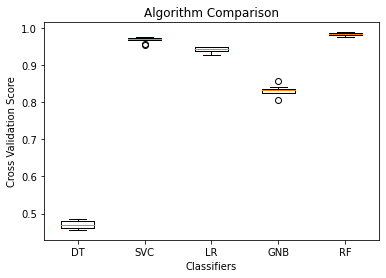

In [ ]:
plt.figure()
plt.title("Algorithm Comparison")
plt.boxplot(results)
plt.xticks(ticks=range(1,6),labels=names)
plt.ylabel("Cross Validation Score")
plt.xlabel("Classifiers")
plt.show()

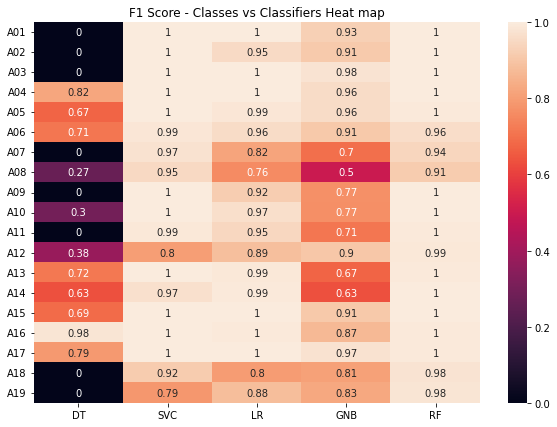

In [ ]:
clf_rep={}

for name,model in models:
    y_pred= model.predict(X_test_pca)
    f1 = f1_score(y_test, y_pred,average=None)
    clf_rep[name]=f1
clf_rep=pd.DataFrame(clf_rep)
plt.figure(figsize=(10,7))
plt.title("F1 Score - Classes vs Classifiers Heat map")
sns.heatmap(clf_rep,yticklabels=target_names,annot=True)
plt.yticks(rotation='horizontal')
plt.show()

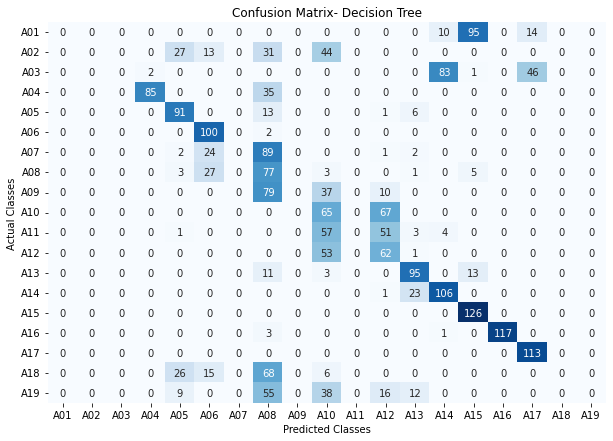

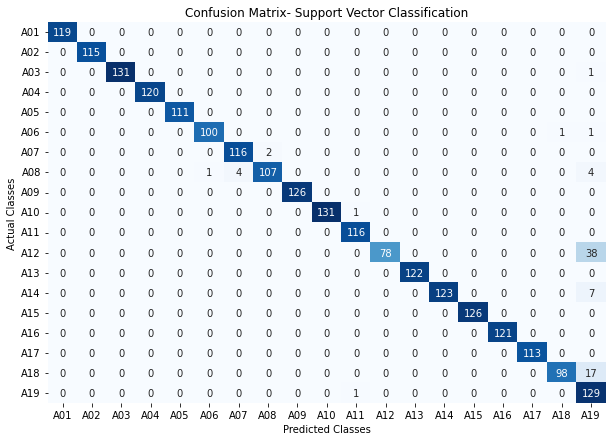

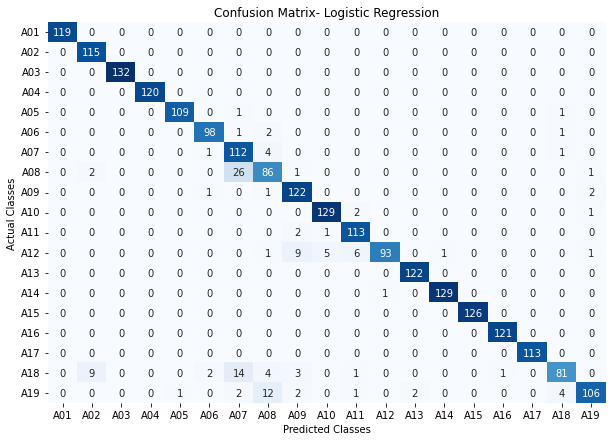

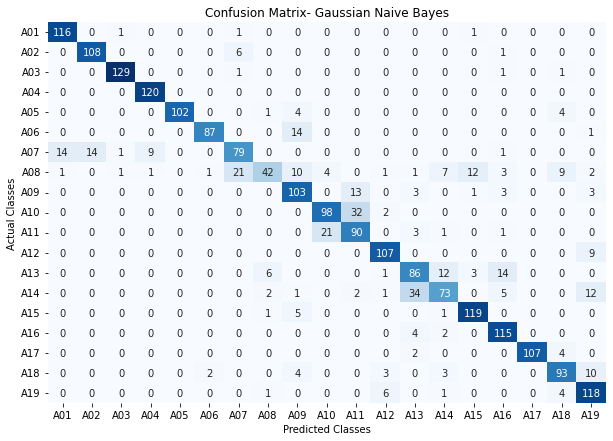

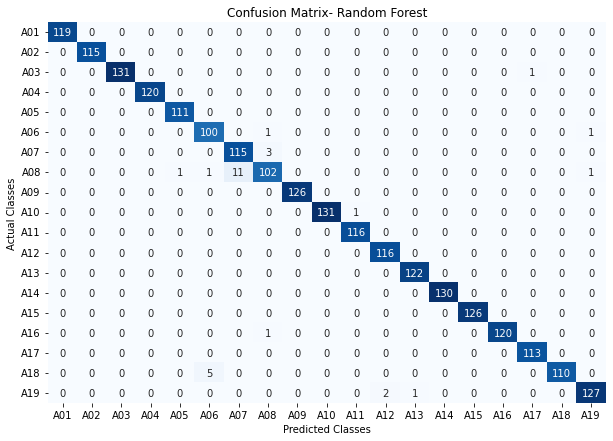

In [ ]:
y_pred_dt = dt_clf.predict(X_test_pca)
y_pred_svc = svc_pca.predict(X_test_pca)
y_pred_log = logreg_clf.predict(X_test_pca)
y_pred_gnb=GNB_pca.predict(X_test_pca)
y_pred_rf=RF_pca.predict(X_test_pca)
cm_dt= confusion_matrix(y_test,y_pred_dt)
cm_svc= confusion_matrix(y_test,y_pred_svc)
cm_log= confusion_matrix(y_test,y_pred_log)
cm_gnb= confusion_matrix(y_test,y_pred_gnb)
cm_rf= confusion_matrix(y_test,y_pred_rf)


plt.figure(figsize=(10,7))
plt.title("Confusion Matrix- Decision Tree")
sns.heatmap(cm_dt,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

plt.figure(figsize=(10,7))
plt.title("Confusion Matrix- Support Vector Classification")
sns.heatmap(cm_svc,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

plt.figure(figsize=(10,7))
plt.title("Confusion Matrix- Logistic Regression")
sns.heatmap(cm_log,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

plt.figure(figsize=(10,7))
plt.title("Confusion Matrix- Gaussian Naive Bayes")
sns.heatmap(cm_gnb,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

plt.figure(figsize=(10,7))
plt.title("Confusion Matrix- Random Forest")
sns.heatmap(cm_rf,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

From the above heatmap we can observe that Support Vector, Gaussian Naive bayes and Random Forest gives better performance with f1 score near to 1 for different Classes and their accuracy score has not varied too much during cross validation, this can be observed from box plot

Below we are just trying the voting model just for experiment and not for this course work

# Voting Model - Ensemble - Not for Coursework Just an Experiment

In [ ]:
# voting Classifier final Model
estimators = []
estimators.append(('svc',svc_pca))
estimators.append(('LR',logreg_clf))
estimators.append(('RF',RF_pca))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca,y_train)
ensemble.score(X_test_pca,y_test)

0.9771929824561404

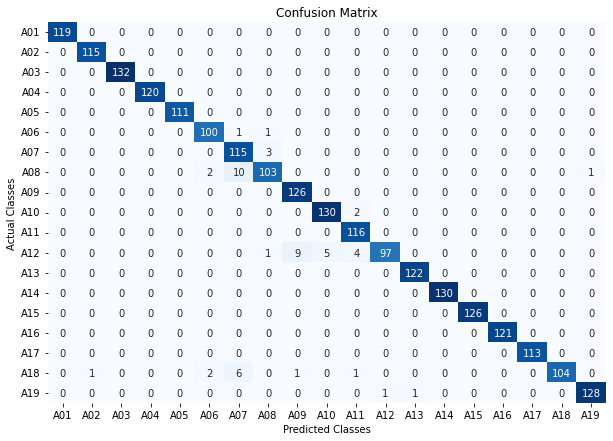

In [ ]:
y_pred_ensemble = ensemble.predict(X_test_pca)
cm= confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix")
sns.heatmap(cm,xticklabels= target_names, yticklabels=target_names,cmap='Blues',label=True,annot=True,fmt='d',cbar=False)
plt.yticks(rotation='horizontal')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# Saving the PCA, Scaling, Model

In [ ]:
pickle.dump(ensemble,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/activity_pred.sav','wb'))
pickle.dump(scaler,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/sensor_scaler.sav','wb'))
pickle.dump(pca,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/pca_sensor_data.sav','wb'))

In [ ]:
# Saving individual Models
pickle.dump(svc_pca,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/svc_pca.sav','wb'))
pickle.dump(GNB_pca,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/GNB_pca.sav','wb'))
pickle.dump(RF_pca,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/RF_pca.sav','wb'))
pickle.dump(logreg_clf,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/logreg_clf.sav','wb'))
pickle.dump(dt_clf,open('/content/drive/MyDrive/Coventry Machine Learning/Couesework/dt_clf.sav','wb'))